## Name: Onkar Potdar

### Problem Statement: The aim of the project is to build Abalone Age Prediction model using ML. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. To download dataset Click Here!

<b> According to Wikipedia, Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae. The dataset is an updated version of a study conducted by a team of scientists in 1994. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other physical measurements, which are easier to obtain, can be used to predict the age.</b>

* Sex - M, F, and I (infant)

* Length - longest shell measurement (mm)

* Diameter - measured perpendicular to length (mm)

* Height - with meat in shell (mm)

* Whole- whole abalone weight (g)

* Shucked - weight of meat only (g)

* Viscera - gut weight, after bleeding (g)

* Shell - weight after being dried (g)

* Rings - +1.5 gives the age in years

### Importing Modules and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

import joblib

### Importing Dataset and creating Instances

In [2]:
os.chdir(".")

df= pd.read_csv("abalone.csv")

df['Age']=df['Rings']+1.5

### Dataset Cleaning

#### checking Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


#### details of numerical columns

In [4]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings          Age  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684    11.433684  
std          0.109614      0.139203     3.224169     3.224169  
min          0.000500      0.001500     1.000000     2.500000  
25%          0.093500      0.130000     8.000000     9.500000  
50%          0.171000      0.234000     9.000000    10.500000  
75%          0.253000      0.329000    11.000000    12.500000  
max          0.760000      1.005000    29.000000    30.500000

#### Unique values in each columns

In [5]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
Age                 28
dtype: int64

#### Unique values in each columns

In [6]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

#### checking null and NA Values

In [7]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

#### Histogram of each column

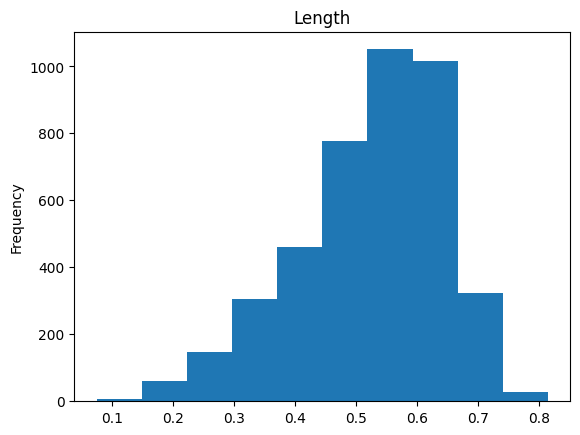

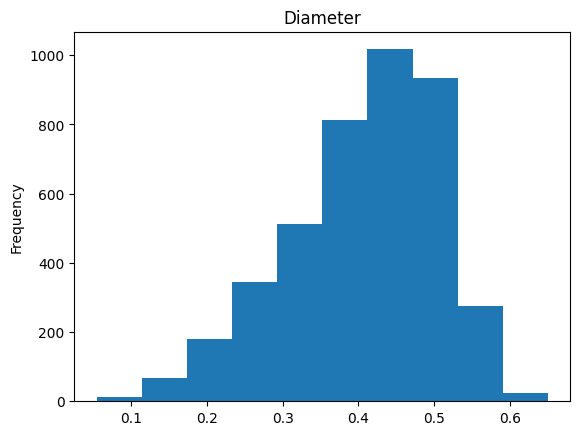

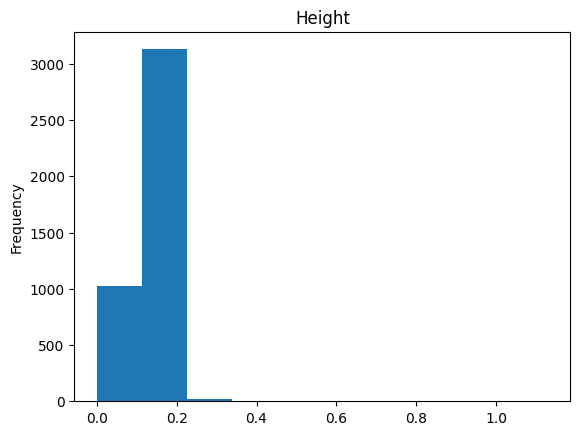

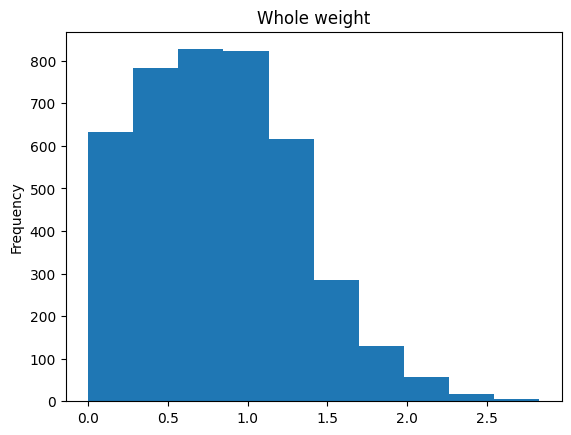

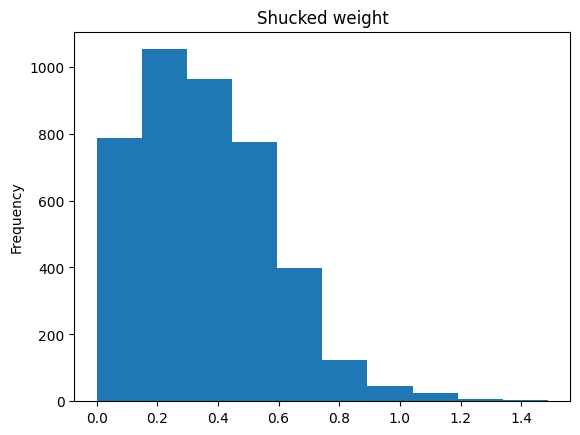

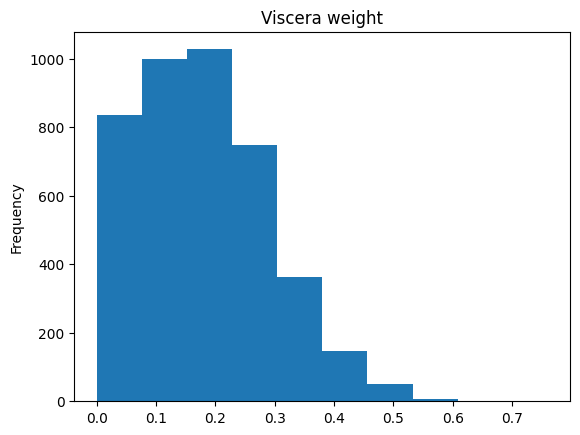

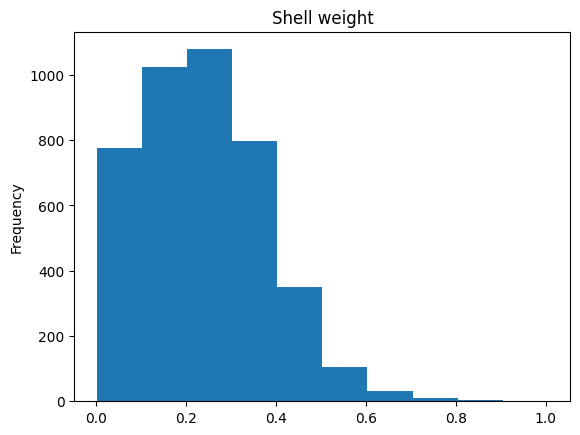

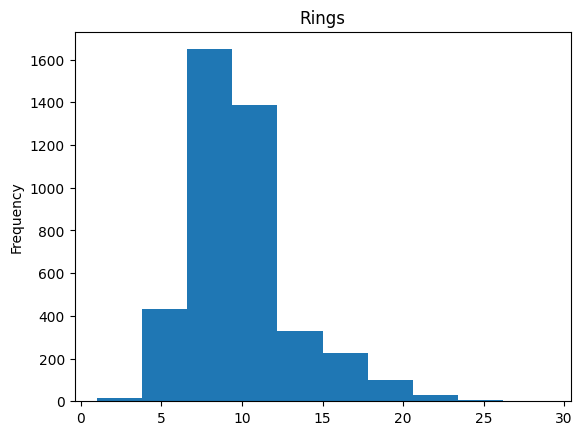

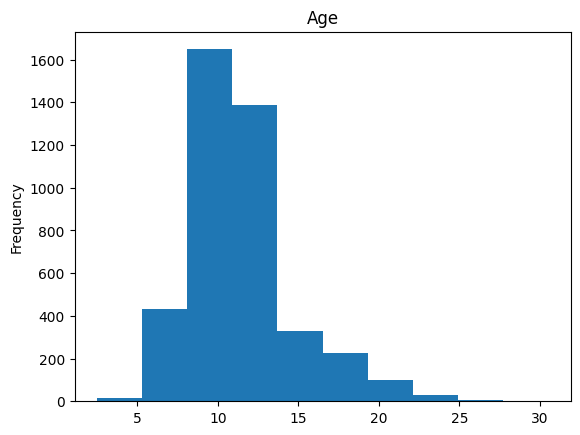

In [9]:
for i in df.columns:
    if df[i].dtype != "object":
        plt.figure()
        plt.title(i)
        df[i].plot(kind='hist')
        plt.show()

#### Correlation of each column with heatmap

<Axes: >

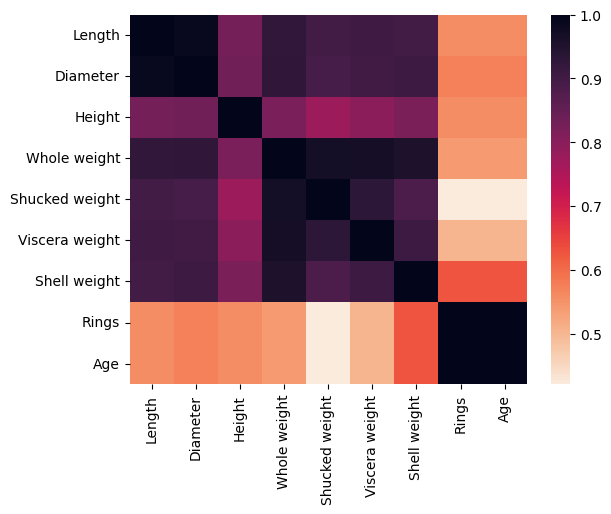

In [10]:
sns.heatmap(df.corr(), cmap="rocket_r")

### Data Split X and Y

In [11]:
df_dum = pd.get_dummies(df,drop_first=True)

x = df_dum.drop(["Age","Rings"],axis=1)
y = df_dum["Age"]

#### PolynomialFeatures

In [12]:
scaler = MinMaxScaler()

poly = PolynomialFeatures(degree=2)

poly_x = poly.fit_transform(x)

scl_x = scaler.fit_transform(poly_x)

df_x = pd.DataFrame(scl_x,columns=poly.get_feature_names_out())

### Data Split in train,test and validation (70:15:15)

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(df_x,y,
                                           test_size=0.3,
                                           random_state=2022)

xval,xtest,yval,ytest=train_test_split(xtest,ytest,
                                           test_size=0.5,
                                           random_state=2022)

### Models

In [14]:
lr = LinearRegression()
en = ElasticNet(random_state=2022)
clf = DecisionTreeRegressor(random_state=2022)
rlr = Ridge(random_state=2022)
llr = Lasso(random_state=2022)
xgb = XGBRegressor(random_state=2022)
svr = SVR()
sgd = SGDRegressor(random_state=2022)

kfold=KFold(n_splits=5,shuffle=True, random_state=2022)

#### LinearRegression

In [15]:
lr.fit(xtrain,ytrain)

y_pred = lr.predict(xtest)

r2_lr=r2_score(ytest, y_pred)

print("LinearRegression:",r2_lr)

LinearRegression: 0.5789262613480177


#### ElasticNet

In [16]:
en.fit(xtrain,ytrain)

y_pred = en.predict(xtest)

r2_en=r2_score(ytest, y_pred)

print("ElasticNet: ", r2_en)

ElasticNet:  0.036539259554192016


#### DecisionTreeRegressor

In [17]:
clf.fit(xtrain,ytrain)

y_pred = clf.predict(xtest)

r2_clf=r2_score(ytest, y_pred)

print("DecisionTreeRegressor: ",r2_clf)

DecisionTreeRegressor:  0.2770916766071493


#### Ridge

In [18]:
rlr.fit(xtrain,ytrain)

y_pred = rlr.predict(xtest)

r2_rlr=r2_score(ytest, y_pred)

print("Ridge: ",r2_rlr)

Ridge:  0.5680972670115603


#### Lasso

In [19]:
llr.fit(xtrain,ytrain)

y_pred = llr.predict(xtest)

r2_llr=r2_score(ytest, y_pred)

print("Lasso: ",r2_llr)

Lasso:  -0.00031000255222846107


#### XGBRegressor

In [20]:
xgb.fit(xtrain,ytrain)

y_pred = xgb.predict(xtest)

r2_xgb=r2_score(ytest, y_pred)

print("XGBRegressor: ",r2_xgb)

XGBRegressor:  0.5226459104939805


#### SVR

In [21]:
svr.fit(xtrain,ytrain)

y_pred = svr.predict(xtest)

r2_svr=r2_score(ytest, y_pred)

print("SVR: ",r2_svr)

SVR:  0.5051661847006438


#### SGDRegressor

In [22]:
sgd.fit(xtrain,ytrain)

y_pred = sgd.predict(xtest)

r2_sgd=r2_score(ytest, y_pred)

print("SGDRegressor:",r2_sgd)

SGDRegressor: 0.5315159772666394


#### GradientBoosting

In [23]:
gbm = GradientBoostingRegressor(random_state=2022)

params = {'learning_rate':np.linspace(0.001, 0.5,10),
          'max_depth':[2,3,4,5,6],
          'n_estimators': [50,100,150]}

gcv_gbm = GridSearchCV(gbm, param_grid=params,cv=kfold,scoring='r2',verbose=1)

gcv_gbm.fit(x,y)

print("GradientBoosting: ",gcv_gbm.best_params_)

print("GradientBoosting: ",gcv_gbm.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
GradientBoosting:  {'learning_rate': 0.05644444444444444, 'max_depth': 4, 'n_estimators': 100}
GradientBoosting:  0.5485617610799532


#### RandomForestRegressor

In [24]:
rfr = RandomForestRegressor(random_state=2022)

params = {"max_features":[2,3,4,5,6]}

gcv_rfr = GridSearchCV(rfr, param_grid=params,cv=kfold,scoring='r2',verbose=1)

gcv_rfr.fit(x,y)

print("RandomForestRegressor: ",gcv_rfr.best_params_)

print("RandomForestRegressor: ",gcv_rfr.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
RandomForestRegressor:  {'max_features': 3}
RandomForestRegressor:  0.5525446746606568


#### ENSEMBLED VOTING METHOD

#### voting without weight

In [25]:
models = [("xgb",xgb),("rlr",rlr),("sgd",sgd)]

voting = VotingRegressor(models,verbose=1)

voting.fit(xtrain,ytrain)

y_pred = voting.predict(xtest)

r2_vwow=r2_score(ytest, y_pred)

print("voting without weight: ",r2_vwow)

[Voting] ...................... (1 of 3) Processing xgb, total=   1.7s
[Voting] ...................... (2 of 3) Processing rlr, total=   0.0s
[Voting] ...................... (3 of 3) Processing sgd, total=   0.2s
voting without weight:  0.5711197340713123


#### voting with weight

In [26]:
voting = VotingRegressor(models,weights=np.array([r2_xgb,r2_rlr,r2_sgd]),verbose=1)

voting.fit(xtrain,ytrain)

y_pred = voting.predict(xtest)

r2_vww=r2_score(ytest, y_pred)

print("voting with weight: ",r2_vww)

[Voting] ...................... (1 of 3) Processing xgb, total=   1.0s
[Voting] ...................... (2 of 3) Processing rlr, total=   0.0s
[Voting] ...................... (3 of 3) Processing sgd, total=   0.2s
voting with weight:  0.5713047790622601


#### ENSEMBLED BAGGING METHOD

#### Bagging

In [27]:
bag=BaggingRegressor(base_estimator=rlr,random_state=2022)

params= {'base_estimator__alpha': np.linspace(0.01,1000)}

gcv=GridSearchCV(bag, param_grid=params,cv=kfold,scoring='r2',verbose=1)

gcv.fit(x,y)

print("Bagging: ",gcv.best_params_)

print("Bagging: ",gcv.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

Bagging:  {'base_estimator__alpha': 0.01}
Bagging:  0.5222960381991301


/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/nirav-ubuntu/env01/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### ENSEMBLED STACKING METHOD

#### StackingRegressor

In [28]:
stack=StackingRegressor(estimators=models,final_estimator=rfr,passthrough=True)

stack.fit(xtrain,ytrain)

y_pred=stack.predict(xtest)

r2_st=r2_score(ytest, y_pred)

print("StackingRegressor: ",r2_st)

StackingRegressor:  0.5790903496704154


### Saving the Best Model

In [29]:
joblib.dump(lr,'abalone_model')

['abalone_model']